In [350]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from numpy.linalg import inv
%matplotlib inline

In [351]:
# original qr code
qr = cv2.imread("images/pattern.jpg")

# test image
img = cv2.imread("images/IMG_6719.JPG")

# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

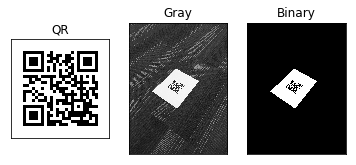

In [352]:
# use binary threshold to convert to black and white for contouring
ret, thresh = cv2.threshold(gray_img, 200, 255, 0)

titles = ['QR','Gray','Binary']
images = [qr, gray_img, thresh]
for i in xrange(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

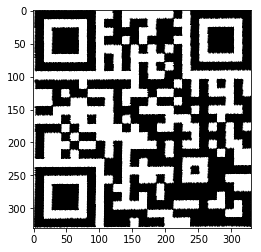

In [353]:
# test using homography (my idea was to get the camera position by 
# dissecting the homography matrix between the QR code and the image)
# One way could be to inverse the homography matrix and position 
# a straight phone at the position of the QR code paper on the ground.

# four corner coordinates of original QR code
qr_corners = np.array([[0, 0], [len(qr), 0], [len(qr), len(qr)], [0, len(qr)]])

# four corner coordinates of test image
img_corners = np.array([[1135, 1424], [1374, 1568], [1198, 1771], [953, 1613]])

h, status = cv2.findHomography(img_corners, qr_corners)
im_out = cv2.warpPerspective(thresh, h, (qr.shape[1], qr.shape[0]))
plt.imshow(im_out, 'gray')

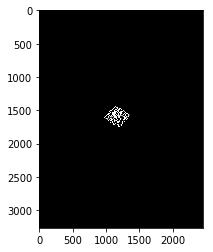

In [354]:
# Using the idea behind the method below, we could use the inverse of the homography matrix
# and warp an iphone placed at the same spot as the QR code in the image below to get
# the exact position and rotation of the camera.

im_out = cv2.warpPerspective(im_out, inv(h), (img.shape[1], img.shape[0]))
plt.imshow(im_out, "gray")

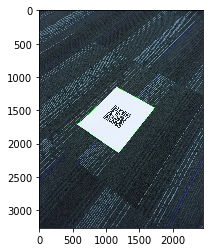

In [355]:
# find a contour that fits well
tmp, cts, hr = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in cts]
max_index = np.argmax(areas)
ct = cts[max_index]
cv2.drawContours(img,[ct],0,(0,255,0), 3)
cv2.imwrite("img.jpg", img)
plt.imshow(img)

In [356]:
# get the four corners of the contour
ct = np.array(ct).flatten()
X = [ct[i] for i in xrange(0, len(ct), 2)]
Y = [ct[i] for i in xrange(1, len(ct), 2)]

# get coordinates of the four corners for homography
# (this does not work for every image)
maxY = np.argmax(ct)
top = (ct[maxY-1], ct[maxY])
minX = np.argmin(ct)
left = (ct[minX], ct[minX+1])
maxX = np.argmax(X) * 2
right = (ct[maxX], ct[maxX+1])
minY = np.argmin(Y) * 2 + 1
bottom = (ct[minY-1], ct[minY])

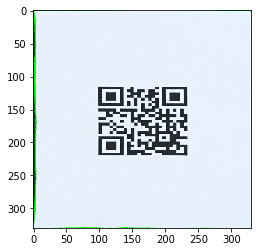

In [357]:
# trying automated homography without corners!
img_corners = np.array([bottom, right, top, left])
h, status = cv2.findHomography(img_corners, qr_corners)
im_out = cv2.warpPerspective(img, h, (qr.shape[1], qr.shape[0]))
plt.imshow(im_out)

In [358]:
# tried to find the initial camera matrix for next steps
cv2.initCameraMatrix2D(qr_corners, img_corners, (row, col)) 

error: /tmp/opencv3-20170226-33996-dwawlt/opencv-3.2.0/modules/calib3d/src/calibration.cpp:3112: error: (-210) objectPoints should contain vector of vectors of points of type Point3f in function collectCalibrationData
